# La ecuacion diferencial a probar:
Decaimiento radioactivo, la cantidad de masa que pierde un elemento radioactivo es proporcional a la cantidad de elemento
$$
\frac{dN}{dt}= - \gamma N
$$

Tenemos para el Uranio 236:
- $\gamma = 4.9 \times 10^{-18} [1/s]$

y convirtiendo las unidades:
- $\gamma = 4.23 \times 10^{-13} [1/dia]$
- $\gamma = 2.96 \times 10^{-12} [1/semana]$
- $\gamma = 1.31 \times 10^{-11} [1/mes]$ (31 dias)

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# constantes:
gamma_dia = 4.23e-13
gamma_semana = 2.96e-12
gamma_mes = 1.31e-11
gamma_prueba = 0.1 # puedes probar con otras constantes peor siguen siendo muy pequeñas
                   # se recomienda el RK4 que aprenderemos para estos casos

# la ecuacion diferencial:
# orden: argumento y parametros
dNdt = lambda N, gamma, bias: - gamma * N * bias


Este notebook es un parentesis, es una guia para programar y entender el archivo `euler_integrator.py` que funcionara como una libreria mas adelante junto a otros integradores

# Euler Forward
Primero la funcion tal y como la utilizamos antes,
$$
x_{k+1} = x_k + \Delta t f(x_k, t_k)
$$

```
euler_forward(dt, T, xdot, x0, t0) -> t_list, x_list
```
y una forma de darle parametros a la funcion interna `xdot`


In [101]:
not(True)

False

In [97]:
# args es un diccionario
def euler_forward(dt, T, xdot, x0, t0, args_for_xdot):
    t = t0
    xk = x0
    while t<T:
        xk1 = xk + dt * xdot(xk, **args_for_xdot) # desempaqueta el diccionario
        t += dt
        xk = xk1
        yield t,xk1     # generadores y los datos nos quedan en tuplas (t_k, x_k)

In [98]:
def unzip(zipped_information):
    ''' usado para separar en dos objetos el output de eulers'''
    unzip = list(zip(*zipped_information))
    return unzip[0], unzip[1]

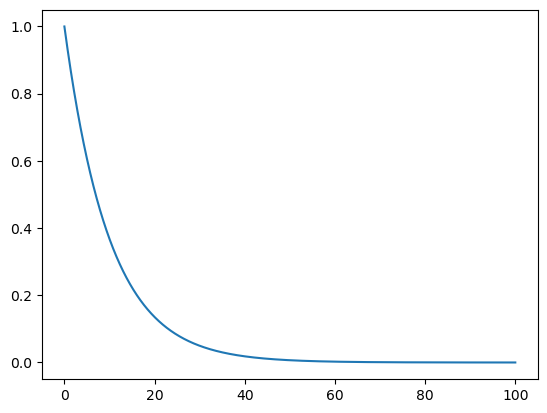

In [99]:
zip_result = euler_forward(0.001, 100, dNdt, 1, 0, {'gamma': 0.1, 'bias': 1})
t, N = unzip(zip_result)

plt.plot(t, N)

# Euler Backward
Mientras que el euler forward para conocer el siguiente punto:
$$
x_{k+1} = x_k + \Delta t f(x_{k+1}, t_k)
$$
donde se puede resolver para $x_{k+1}$ mediante:
- Fixed Point Iteration
- Newton Rhapson

#### Fixed Point
se repite el proceso de xk1 y luego de una cantidad de iteraciones esta debe mantenerse cercana al valor

0.29969999999999997
0.2997003
0.2997002997
0.2997002997003
0.2997002997002997
0.2997002997002997
0.2997002997002997
0.2997002997002997
0.2997002997002997
0.2997002997002997


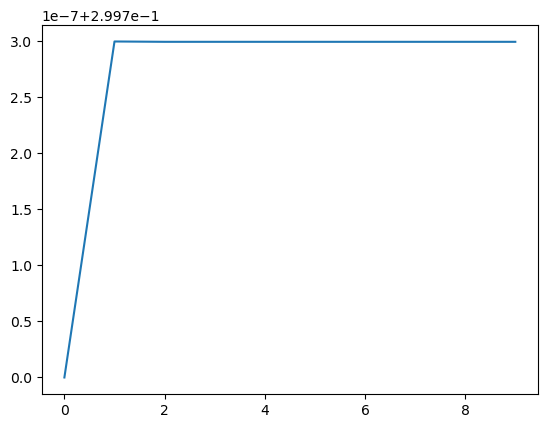

In [124]:

# preparativos para visualizar
xks = []


# ---------- dentro de euler_backward
# seccion de argumentos
dt = 0.01
args_for_xdot = {'gamma': 0.1, 'bias': 1}
fixedPoint_iterations = 10

# dentro de la funcion
x0 = 0.3
xk = x0
xk1 = x0

# fixed point iteration
for _ in range(fixedPoint_iterations):
    xk1 = xk + dt * dNdt(xk1, **args_for_xdot)
    print(xk1)
    xks.append(xk1)

    # ifs: escapar en caso de que la diferencia entre puntos es menor a 1e-15,



# plot
plt.plot(xks)
plt.show()

#### Newton Rhapson
El problema de hallar $x_{k+1}$ es equivalente a encontrar las raices de $g$
$$
0 = x_k - x_{k+1} + \Delta t f(x_{k+1}, t_k) = g(x_{k+1})
$$

In [ ]:
# 230117 - aun por escribir
def euler_backward(dt, T, xdot, x0, t0, args_for_xdot, 
    fixedPoint_iterations = 10):

    fixedPoint_treshold = dt * dt # regla objetiva, ignoramos O(dt**2)

    t = t0
    xk = x0
    xk1 = x0

    while t<T:
        # fixedPoint Iteration
        xk1 = xk + dt * xdot(xk1, **args_for_xdot) # desempaqueta el diccionario
        t += dt
        xk = xk1
        yield t,xk1     # generadores y los datos nos quedan en tuplas (t_k, x_k)